#  ACC and GYR - physical activity detection

## Joni Rajamaki and Usairim Isani



In [32]:
%xmode Minimal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import tsfel
import random

# Machine learning packages - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier

Exception reporting mode: Minimal


In [33]:
import warnings
warnings.filterwarnings(action='ignore')

In [34]:
data_path = "./Data"
train_data_path = f'{data_path}/Train'
test_data_path = f'{data_path}/Test'
extracted_features_path = "./Features"

In [35]:
train_dir = os.listdir(train_data_path)

In [36]:
test_df = pd.read_csv("./Data/Train/standing/sample_ID10_exp19_125.csv")
cfg_file = tsfel.get_features_by_domain(json_path="./features.json")



In [37]:
tsfel.get_number_features(cfg_file)
extracted_features = tsfel.time_series_features_extractor(
    cfg_file, test_df, fs=50, window_size=250, verbose=0)
extracted_features.to_csv("./test.csv")
print(len(extracted_features.columns)/6)
extracted_features


149.0


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
0,257.983808,5.057764,257.983808,0.64478,9.963536e-08,0.000004,0.000004,7.373815e-07,0.000002,0.000003,...,0.655464,0.100503,4.227187,0.00356,0.00001,0.000091,0.025914,0.068832,0.596355,29.0


Text(0, 0.5, 'Amplitude.')

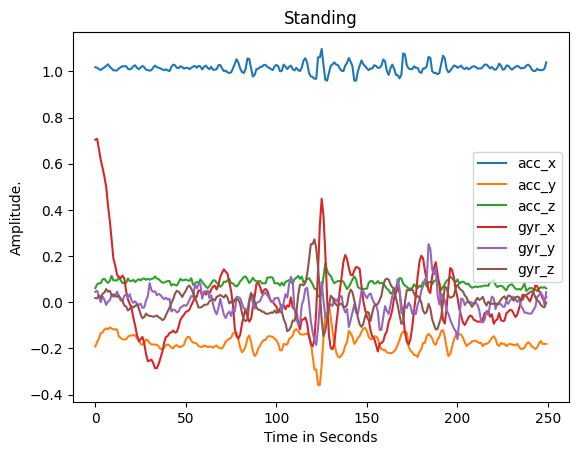

In [57]:
ax = test_df.plot.line()
ax.set_title("Standing")
ax.set_xlabel("Time in Seconds")
ax.set_ylabel("Amplitude.")


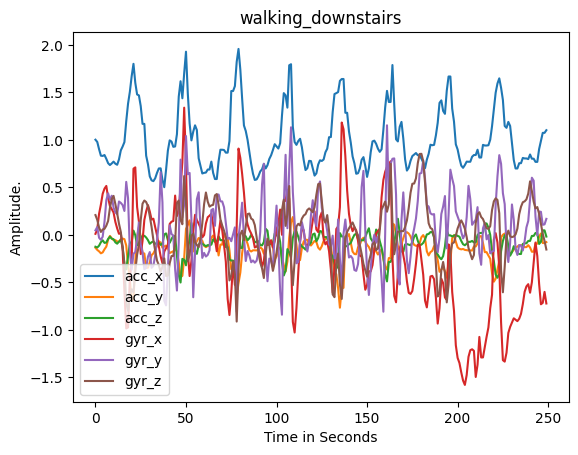

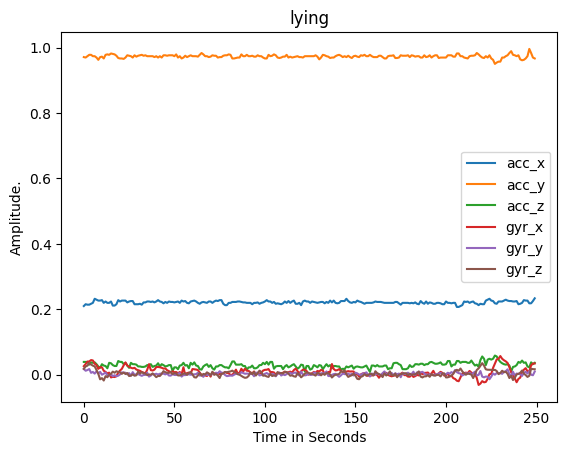

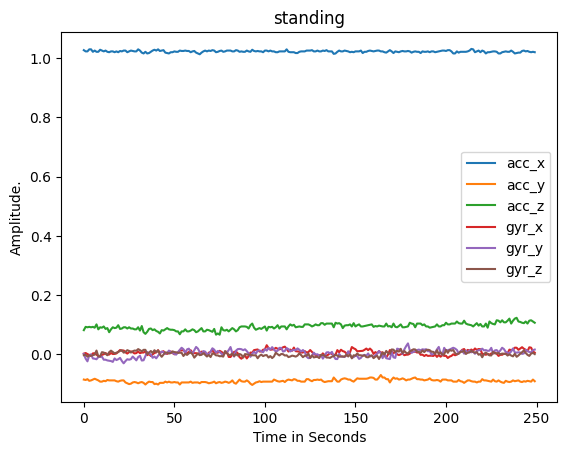

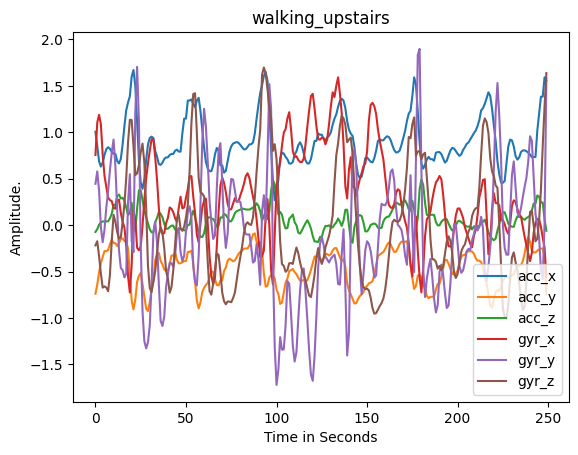

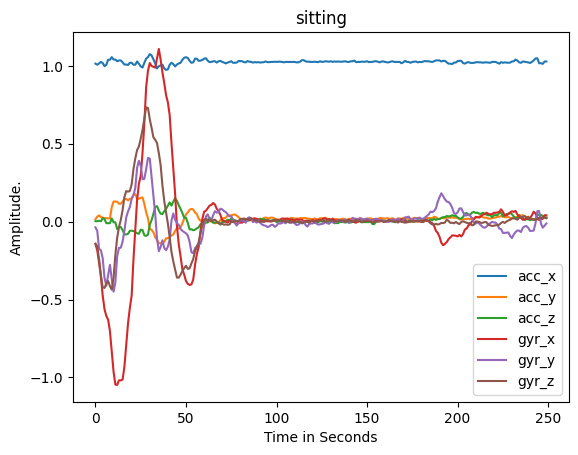

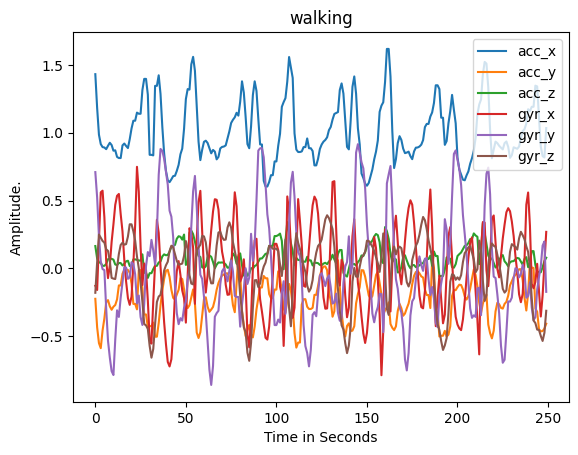

In [63]:
samples = []
for folder in os.listdir(train_data_path):
    file = random.choice(os.listdir(f'{train_data_path}/{folder}'))
    sample_df = pd.read_csv(f'{train_data_path}/{folder}/{file}')
    ax = sample_df.plot.line()
    ax.set_title(folder)
    ax.set_xlabel("Time in Seconds")
    ax.set_ylabel("Amplitude.")


In [39]:
def read_data(data_path):
    folders = {}
    for folder in os.listdir(data_path):
        samples = {}
        for file in os.listdir(f'{data_path}/{folder}'):
            with open(f'{data_path}/{folder}/{file}') as f:
                sample_df = pd.read_csv(f)
                samples[file]=sample_df
        folders[folder] = samples
    return folders


In [40]:
train_data = read_data(train_data_path)
test_data = read_data(test_data_path)

In [41]:
cfg_file = tsfel.get_features_by_domain(json_path="./features.json")
tsfel.get_number_features(cfg_file)

279

# Selected Features
The features are selected by setting the flag "`use`" `yes` or `no` in the `features.json` file.
- Spectral
  - FFT mean coefficient
  - Fundamental frequency
  - Max power spectrum (Max PSD)
  - Power bandwidth (PSD Bandwidth)
  - Spectral entropy
  - Spectral variation
  - Wavelet absolute mean (CWT absolute mean value of each wavelet scale)
  - Wavelet energy (CWT energy of each wavelet scale)
  - Wavelet entropy (CWT entropy of each wavelet scale)
- Statistical
  - Absolute energy
  - Entropy
  - Inter-quartile range
  - Kurtosis
  - Mean
  - Mean absolute deviation
  - Root mean square
  - Variance
- Temporal
  - Area under the curve
  - Autocorrelation
  - Mean absolute diff
  - Zero crossing rate



In [42]:
def extract_features(data, out):
    for label in data:
        for subject in data[label]:
            subject_df = data[label][subject]
            extracted_features = tsfel.time_series_features_extractor(cfg_file, subject_df, fs=50, window_size=250 , verbose=0)
            extracted_features.insert(0,"Label", label)
            extracted_features.insert(0,"Subject",subject)
            extracted_features.to_csv(f'{extracted_features_path}/{out}/{subject}.csv') 

In [ ]:

extract_features(train_data, "Train")
extract_features(test_data, "Test")

In [44]:
def data_to_csv(path, name):
    all_files = glob.glob(f'{extracted_features_path}/{path}/*.csv')
    extracted_features_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    extracted_features_df.to_csv(f'{extracted_features_path}/{name}.csv')

In [45]:
data_to_csv("Train", "training")
data_to_csv("Test", "testing")

In [46]:
training_features = pd.read_csv(f'{extracted_features_path}/training.csv')
testing_features = pd.read_csv(f'{extracted_features_path}/testing.csv')

In [47]:
training_features.sample(10)

,Unnamed: 0.1,Unnamed: 0,Subject,Label,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
640,640,0,sample_ID16_exp32_188.csv,walking_upstairs,216.119951,4.537111,216.119951,0.917116,5.707382e-04,0.000221,...,0.507052,0.124989,15.482685,0.071270,0.002591,0.007089,0.088125,0.190411,0.613483,16.0
615,615,0,sample_ID10_exp19_112.csv,sitting,157.975510,3.958639,157.975510,0.383544,1.043174e-08,0.000001,...,0.842582,0.236075,1.183246,0.000027,0.000012,0.000011,0.004480,0.004706,0.692556,91.0
102,102,0,sample_ID12_exp24_162.csv,walking,273.285202,5.048986,273.285202,0.949898,5.312117e-04,0.000012,...,0.463955,0.445090,37.341276,0.180082,0.001362,0.002657,0.204373,0.448532,0.597188,36.0
1148,1148,0,sample_ID5_exp9_51.csv,sitting,161.937076,4.008000,161.937076,0.532480,2.490516e-06,0.000035,...,0.742850,0.086228,2.903137,0.000888,0.000185,0.000238,0.020075,0.048223,0.623092,63.0
899,899,0,sample_ID18_exp37_236.csv,sitting,241.296500,4.892486,241.296500,0.388371,4.584264e-08,0.000004,...,0.898248,0.208893,1.224174,0.000026,0.000006,0.000008,0.004933,0.005441,0.691862,101.0
142,142,0,sample_ID1_exp1_8.csv,walking,271.382560,5.009042,271.382560,0.945010,4.039247e-04,0.000400,...,0.516553,0.559258,38.471377,0.131729,0.003004,0.005730,0.227172,0.422108,0.627196,44.0
250,250,0,sample_ID19_exp38_255.csv,walking,269.187045,4.941542,269.187045,0.946507,2.042261e-04,0.000057,...,0.583684,0.259527,39.275276,0.189083,0.001253,0.000089,0.216660,0.503281,0.605338,31.0
537,537,0,sample_ID19_exp38_279.csv,standing,245.607933,4.936083,245.607933,0.383825,5.461698e-08,0.000001,...,0.700827,0.227756,1.203099,0.000051,0.000027,0.000075,0.004897,0.005682,0.690109,58.0
1027,1027,0,sample_ID13_exp26_172.csv,walking,248.893017,4.838597,248.893017,0.950145,4.169965e-05,0.000055,...,0.562318,0.376350,37.428324,0.134991,0.001922,0.004647,0.198137,0.477208,0.594160,40.0
781,781,0,sample_ID13_exp26_173.csv,walking,242.897221,4.812084,242.897221,0.939672,1.429449e-04,0.000045,...,0.623277,0.273761,31.181005,0.091746,0.001415,0.004252,0.185221,0.353164,0.639965,36.0


In [48]:
testing_features.sample(10)

,Unnamed: 0.1,Unnamed: 0,Subject,Label,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
701,701,0,sample_ID23_exp46_342.csv,lying,1.122006,0.332500,1.122006,0.487025,3.912216e-08,3.826560e-05,...,0.909817,0.246802,1.284650,0.000022,0.000021,0.000045,0.004705,0.004242,0.691424,115.0
493,493,0,sample_ID28_exp56_411.csv,sitting,254.939583,5.028889,254.939583,0.433735,1.706175e-07,5.357073e-06,...,0.654782,0.182104,1.716837,0.000383,0.000037,0.000088,0.008490,0.017898,0.629080,45.0
423,423,0,sample_ID24_exp48_284.csv,walking_upstairs,254.320079,4.900361,254.320079,0.924475,9.579987e-05,1.891984e-04,...,0.431562,0.339156,15.804611,0.087295,0.000662,0.001708,0.092029,0.223083,0.592201,17.0
398,398,0,sample_ID30_exp60_437.csv,sitting,245.740493,4.936722,245.740493,0.518225,9.638174e-06,1.628747e-05,...,0.469776,0.110038,1.685377,0.001355,0.000018,0.000439,0.006750,0.016828,0.635903,50.0
724,724,0,sample_ID28_exp57_391.csv,walking,270.239932,4.988820,270.239932,0.942736,5.524879e-07,7.518787e-05,...,0.564519,0.264910,37.715737,0.203176,0.001160,0.004140,0.221954,0.528662,0.591092,34.0
806,806,0,sample_ID21_exp43_290.csv,walking,238.525094,4.707153,238.525094,0.940860,3.198028e-04,1.684920e-04,...,0.498692,0.312104,29.851763,0.113623,0.001646,0.004058,0.152473,0.393478,0.588389,36.0
299,299,0,sample_ID22_exp44_324.csv,lying,0.709186,0.264528,0.709186,0.424698,6.479302e-08,4.453813e-06,...,0.782985,0.316720,1.218371,0.000038,0.000049,0.000104,0.004632,0.006978,0.676053,76.0
9,9,0,sample_ID28_exp57_452.csv,standing,252.765850,5.007556,252.765850,0.564294,3.847947e-07,2.589684e-06,...,0.670270,0.136769,2.774245,0.001233,0.000416,0.000836,0.016734,0.036920,0.632403,34.0
279,279,0,sample_ID28_exp57_459.csv,standing,250.818743,4.987972,250.818743,0.428654,3.528860e-07,5.233972e-07,...,0.683456,0.210032,1.354899,0.000190,0.000109,0.000306,0.006325,0.013954,0.621532,51.0
25,25,0,sample_ID29_exp58_322.csv,walking_downstairs,293.843212,5.051472,293.843212,0.950903,6.496488e-04,1.093075e-03,...,0.631560,0.247609,32.530101,0.116112,0.001935,0.003159,0.215790,0.403467,0.636224,40.0


In [49]:
# Separate the labels to their own dataframe
testing_labels = testing_features["Label"]
training_labels = training_features["Label"]

# Drop labels from rest of data
testing_features_no_labels = testing_features.drop(["Label", "Subject", "Unnamed: 0.1", "Unnamed: 0"], axis=1)
training_features_no_labels = training_features.drop(["Label","Subject","Unnamed: 0","Unnamed: 0.1"], axis=1)

# Check data
testing_features_no_labels.head(10)
training_features_no_labels.head(10)

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
0,258.546808,5.064347,258.546808,0.469982,8.930358e-07,0.000001,1.804824e-06,1.755706e-07,4.329717e-09,7.407555e-07,...,0.513446,0.086247,1.630399,0.001202,0.000396,0.001333,0.009784,0.018002,0.650180,35.0
1,248.411002,4.845931,248.411002,0.915121,1.130804e-05,0.000018,5.730127e-03,2.574324e-06,2.868079e-05,2.289826e-06,...,0.556071,0.203526,29.871005,0.107398,0.001722,0.005813,0.160284,0.348074,0.607315,27.0
2,308.463970,4.970222,308.463970,0.947624,5.951605e-06,0.000046,6.574936e-01,2.151293e-05,2.239500e-05,2.164571e-04,...,0.625568,0.303411,39.541918,0.135563,0.001787,0.003910,0.227345,0.479860,0.619061,38.0
3,262.718817,4.963459,262.718817,0.935080,2.204985e-04,0.000032,2.183648e-03,5.651155e-06,1.139201e-05,2.454628e-04,...,0.642510,0.383933,29.790676,0.073153,0.001423,0.001955,0.199387,0.347619,0.655709,43.0
4,175.813698,4.175834,175.813698,0.460512,2.385487e-06,0.000002,2.727445e-07,4.223715e-07,6.484205e-07,5.035846e-08,...,0.744698,0.138697,1.815797,0.000268,0.000221,0.000708,0.010252,0.016884,0.669550,70.0
5,260.968683,5.087459,260.968683,0.638950,5.746562e-06,0.000006,1.755860e-06,1.588549e-06,1.742075e-07,3.074217e-08,...,0.638892,0.105738,5.465717,0.006712,0.000089,0.000374,0.033344,0.078362,0.606586,41.0
6,279.114259,4.888556,279.114259,0.954295,1.805066e-03,0.000115,9.058675e-02,1.200714e-06,7.689032e-05,3.917499e-06,...,0.671864,0.165213,28.706696,0.107659,0.001060,0.002162,0.169968,0.405986,0.596322,29.0
7,266.083682,4.967153,266.083682,0.932510,1.365879e-04,0.000333,3.249240e-02,1.797146e-04,2.467394e-06,3.568511e-05,...,0.589750,0.419934,32.439999,0.123942,0.000517,0.000953,0.190613,0.441615,0.615399,38.0
8,0.114606,0.072583,0.114606,0.612388,1.726944e-05,0.000168,5.577407e-06,4.644909e-07,4.466828e-07,9.200973e-07,...,0.680178,0.121308,2.576324,0.001047,0.000011,0.000188,0.015959,0.044834,0.597038,58.0
9,1.527849,0.384806,1.527849,0.578014,7.811763e-06,0.000175,4.145391e-08,9.037507e-09,4.609891e-08,4.689848e-08,...,0.881314,0.238644,1.189355,0.000029,0.000004,0.000106,0.004857,0.005843,0.689847,85.0


In [50]:
# Standardize data (default value is 0)
scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(training_features_no_labels)
testing_features_scaled = scaler.transform(testing_features_no_labels)

In [51]:
training_features.shape

(1170, 898)

In [52]:
training_labels.shape

(1170,)

In [53]:
# Train KNN model
train_knn = KNeighborsClassifier(n_neighbors=3) #define the model
train_knn.fit(training_features_scaled, training_labels) #train/fit model and data
predictions_knn = train_knn.predict(testing_features_scaled) #predictions

print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
acc = metrics.accuracy_score(testing_labels, predictions_knn) #get accuracy score
print("accuracy:",acc) #print accuracy score

[[ 81   3   0   0   0   0]
 [  0 152  17   0   0   0]
 [  0  30 158   0   0   0]
 [  0   0   3 139   2   0]
 [  0   0   0  14  97   8]
 [  0   0   0   2  10 116]]
accuracy: 0.8930288461538461


Accuracy pair group
which parts was it better
Compare methods ML, affects of hyperparameter on results

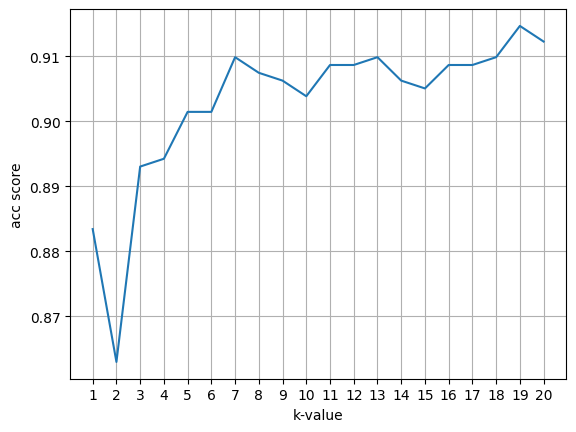

In [54]:
# Trying different k-values (0-20)
accuracies = []
for k in range(1,21):
    train_knn = KNeighborsClassifier(n_neighbors=k) #define the model
    train_knn.fit(training_features_scaled, training_labels) #train/fit model and data
    predictions_knn = train_knn.predict(testing_features_scaled) #predictions

    #print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
    acc = metrics.accuracy_score(testing_labels, predictions_knn) #get accuracy score
    #print("accuracy:",acc) #print accuracy score
    accuracies.append(acc)

plt.plot(range(1,21),accuracies,)
plt.ylabel('acc score')
plt.xlabel('k-value')
plt.xticks(range(1,21))
plt.grid()

In [55]:
# Train RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(training_features_scaled, training_labels)
prediction_ridge = ridge.predict(testing_features_scaled)
print(metrics.confusion_matrix(testing_labels, prediction_ridge)) #print confusion matrix with labels_train vs. the predictions
acc = metrics.accuracy_score(testing_labels, prediction_ridge) #get accuracy score
print("accuracy:",acc) #print accuracy score

[[ 81   3   0   0   0   0]
 [  0 163   6   0   0   0]
 [  0  12 176   0   0   0]
 [  0  12  12 117   1   2]
 [  0   5  35   4  67   8]
 [  0  16  15   0   0  97]]
accuracy: 0.8425480769230769


In [56]:
# AUROC and ROC Curves
#https://www.w3schools.com/python/python_ml_auc_roc.asp used this as an example.
def plot_roc_curve(true_y, predictions):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, predictions) #fpr as false positive rate ja tpr as true positive rate
    # roc_auc = metrics.auc(fpr, tpr) #area under curve
    # plt.plot(fpr,tpr) # plot false positive vs true positive line
    # plt.plot([0,1], [0,1], color='r', linestyle="--") # random guess line
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # print("AUROC =", roc_auc) #print auroc score
    
plot_roc_curve(testing_labels, predictions_knn) #call function with knn
plot_roc_curve(testing_labels, prediction_ridge) #call function with ridge

ValueError: multiclass format is not supported

# Discussion 
- Features 
  - Study more about the features we have 
  - Use a smaller subset
  - read more docs for tsfel
- Accuracy ? 
  - Over fitting
  - Just too many features makes accurate
- Evaluation of the model
  - auc-roc curve
  - F1Score
  - confidence score
- Hyper parameter tuning


plot activities
plot hyperparameters with models